### A/B Test with Python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

In [3]:
df = pd.read_csv('course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [4]:
# Get dataframe with all records from control group
control_df = df.query('group == "control"')

# Compute click through rate for control group
control_ctr = control_df.query('action == "enroll"').id.nunique() / control_df.query('action == "view"').id.nunique()

# Display click through rate
control_ctr

0.2364438839848676

In [5]:
# Get dataframe with all records from experiment group
experiment_df = df.query('group == "experiment"')

# Compute click through rate for experiment group
experiment_ctr = experiment_df.query('action == "enroll"').id.nunique() / experiment_df.query('action == "view"').id.nunique()

# Display click through rate
experiment_ctr

0.2668693009118541

In [6]:
# Compute the observed difference in click through rates
obs_diff = experiment_ctr - control_ctr

# Display observed difference
obs_diff

0.030425416926986526

In [7]:
experiment_df.query('action == "view"').id.nunique()

1645

In [10]:
# Create a sampling distribution of the difference in proportions
# with bootstrapping
diffs = []
for _ in range(10000):
    b_samp = df.sample(df.shape[0], replace = True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "enroll"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "enroll"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(control_ctr - experiment_ctr)

(array([   22.,   127.,   579.,  1697.,  2809.,  2585.,  1503.,   535.,
          132.,    11.]),
 array([-0.08492489, -0.07385237, -0.06277985, -0.05170734, -0.04063482,
        -0.0295623 , -0.01848978, -0.00741727,  0.00365525,  0.01472777,
         0.02580029]),
 <a list of 10 Patch objects>)

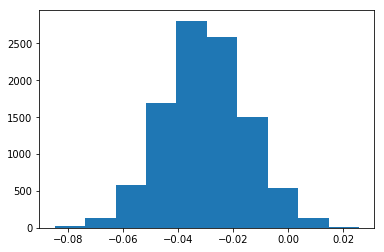

In [34]:
# Convert to numpy array
diffs = np.asarray(diffs)

# Plot sampling distribution

plt.hist(diffs)

(array([  3.90000000e+01,   2.86000000e+02,   1.17500000e+03,
          2.50300000e+03,   3.01800000e+03,   2.04300000e+03,
          7.76000000e+02,   1.42000000e+02,   1.70000000e+01,
          1.00000000e+00]),
 array([-0.05089701, -0.03912641, -0.02735582, -0.01558523, -0.00381463,
         0.00795596,  0.01972655,  0.03149715,  0.04326774,  0.05503833,
         0.06680893]),
 <a list of 10 Patch objects>)

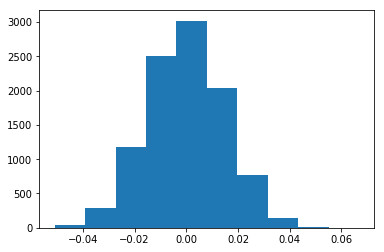

In [36]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

# Plot the null distribution
plt.hist(null_vals)

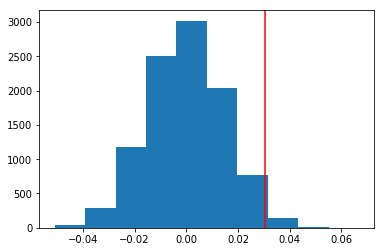

In [40]:
# Plot observed statistic with the null distibution

plt.hist(null_vals)
plt.axvline(x = obs_diff, color = 'red')

In [41]:
# Compute p-value

(null_vals > diffs).mean()

0.92090000000000005